In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('appl_1980_2014.csv')

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [4]:
import matplotlib.pyplot as plot

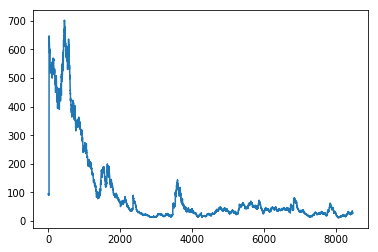

In [5]:
plot.plot(dataset['Close'])

In [6]:
x= pd.to_datetime(dataset['Date'])

In [7]:
y= dataset['Close']

C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


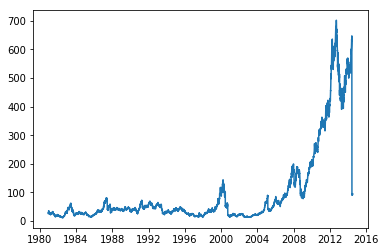

In [8]:
plot.plot(x,y)

In [9]:
dataset2 = pd.read_csv('SaratogaHouses.csv')

In [10]:
dataset2.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


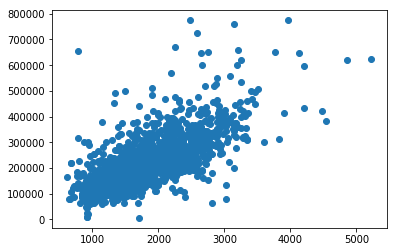

In [11]:
plot.xlabel = 'LivingArea'
plot.scatter(dataset2['livingArea'],dataset2['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27024519e80>,
 'caps': [<matplotlib.lines.Line2D at 0x27024525550>,
 'boxes': [<matplotlib.lines.Line2D at 0x27024519a20>],
 'medians': [<matplotlib.lines.Line2D at 0x27024525be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27024525f28>],
 'means': []}

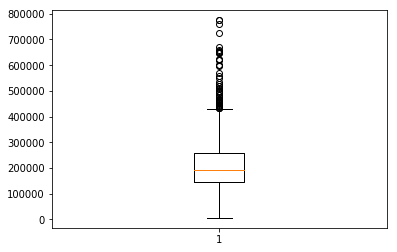

In [12]:
plot.boxplot(dataset2['price'])

In [13]:
#feature or independent variable
x = dataset2['livingArea'].values
#target or lable or dependent variable
y = dataset2['price'].values

In [14]:
y

array([132500, 181115, 109000, ..., 194900, 125000, 111300], dtype=int64)

In [15]:
x

array([ 906, 1953, 1944, ..., 1099, 1225, 1959], dtype=int64)

In [16]:
mean_x = x.mean()
mean_y = y.mean()

In [17]:
# m = [sigma(mean_y - y)(mean_x - x)]/[sigma(mean_x - x)^2]
num = 0 
den = 0

for i in range(len(x)):
    num += (mean_y - y[i])*(mean_x - x[i])
    den += (mean_x - x[i])**2

m = num/den
c = mean_y - m*mean_x

In [18]:
m, c

(113.1225418468094, 13439.394004889764)

In [19]:
#scipy - scientific python
from scipy.stats import linregress

In [20]:
# y_new = [((x[i]*m)+c) for i in range(len(x))]
# y_new
linregress(x,y)

LinregressResult(slope=113.12254184680961, intercept=13439.394004889386, rvalue=0.7123902334268238, pvalue=9.486239939676993e-268, stderr=2.6823410034486286)

In [21]:
y_pred = m*x +c

In [22]:
y_pred

array([115928.4169181 , 234367.71823171, 233349.61535509, ...,
       137761.06749453, 152014.50776723, 235046.45348279])

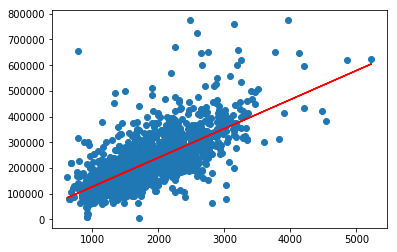

In [23]:
plot.scatter(x,y)
plot.plot(x,y_pred,color = 'red')

In [24]:
y[:10]

array([132500, 181115, 109000, 155000,  86060, 120000, 153000, 170000,
        90000, 122900], dtype=int64)

In [25]:
y_pred[:10]

array([115928.4169181 , 234367.71823171, 233349.61535509, 233349.61535509,
       108462.32915621, 143756.56221241, 324752.62916731, 201449.05855429,
       198055.38229888, 173620.91325997])

In [26]:
#sklearn - scikit learn
from sklearn.metrics import mean_squared_error

# #MSE - mean squared error
# #MSE = [sigma(y_cap - y)^2]/n

# y_mse_num = 0
# for i in range(len(y)):
#     y_mse_num += (y_pred[i] - y[i]) ** 2
# y_mse_den = (len(y))
# y_mse = y_mse_num / y_mse_den

#              or

# ((y_pred - y)**2).mean()  #direct method to find MSE

y_mse = mean_squared_error(y,y_pred) 

#RMSE - Root mean squared error
# RMSE = underroot(MSE)
y_rmse = np.sqrt(y_mse)

(y_mse,y_rmse)

(4769912967.014985, 69064.55651790566)

In [27]:
# error/loss is denoted by J where J = sigma(y_cap - y)^2

In [28]:
newY = m*x[0]+c

In [29]:
newY

115928.41691809907